In [24]:
import pandas as pd

df = pd.read_csv('breastcancer_csv')
pd.set_option('display.max_rows', None)
# Selecteer alle rijen waar 'Marg.adhesion' groter is dan 8
selected_rows = df[df['Bare.nuclei'].isna()]

# Laat de geselecteerde rijen zien
print(selected_rows)

          Id  Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  \
23   1057013             8          4           5              1   
40   1096800             6          6           6              9   
139  1183246             1          1           1              1   
145  1184840             1          1           3              1   
158  1193683             1          1           2              1   
164  1197510             5          1           1              1   
235  1241232             3          1           4              1   
249   169356             3          1           1              1   
275   432809             3          1           3              1   
292   563649             8          8           8              1   
294   606140             1          1           1              1   
297    61634             5          4           3              1   
315   704168             4          6           5              6   
321   733639             3          1           

In [1]:
#Manova test
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
import statsmodels.api as sm

df = pd.read_csv('breastcancer_csv')

# Replace '.' with '_' in column names
df.columns = df.columns.str.replace('.', '_')

df['Class'] = df['Class'].map({'benign': 0, 'malignant': 1})

# Selecteren van de relevante features en de 'Class' feature
features = ['Cl_thickness', 'Cell_size', 'Cell_shape', 'Marg_adhesion', 
            'Epith_c_size', 'Bare_nuclei', 'Bl_cromatin', 'Normal_nucleoli', 'Mitoses']
data_selected = df[features]

# Uitvoeren van MANOVA
manova = MANOVA.from_formula('Cl_thickness + Cell_size + Cell_shape + Marg_adhesion + Epith_c_size + Bare_nuclei + Bl_cromatin + Normal_nucleoli + Mitoses ~ Class', data=df)

# Tonen van de resultaten
print(manova.mv_test())


from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform univariate ANOVAs for each dependent variable
for dep_var in features:  # Exclude 'Class'
    anova_result = sm.stats.anova_lm(sm.OLS.from_formula(f"{dep_var} ~ Class", data=df).fit())
    print(f"Dependent Variable: {dep_var}")
    print(anova_result)

    # Perform Tukey's HSD post-hoc test
    tukey_result = pairwise_tukeyhsd(df[dep_var], df['Class'])
    print(tukey_result.summary())

# Note: Adjust p-values for multiple comparisons (e.g., Bonferroni)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2257 9.0000 673.0000 256.4890 0.0000
         Pillai's trace 0.7743 9.0000 673.0000 256.4890 0.0000
 Hotelling-Lawley trace 3.4300 9.0000 673.0000 256.4890 0.0000
    Roy's greatest root 3.4300 9.0000 673.0000 256.4890 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         Class          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1567 9.0000 673.0000 402.4991 0.0000
         Pillai's trace 0.8433 9.0000 673.0000 402.4991 0.0000
 Hotelling-

In [14]:
#Proportie tests
from statsmodels.stats.proportion import proportion_confint
import pandas as pd

df = pd.read_csv('breastcancer_csv')

aantal_benign_gevallen = df[df['Class'] == 'benign'].shape[0]
aantal_malignant_gevallen = df[df['Class'] == 'malignant'].shape[0]

totaal = len(df)

ci_low, ci_upp = proportion_confint(aantal_benign_gevallen, totaal, alpha=0.05, method='normal')
ci_low_1, ci_upp_1 = proportion_confint(aantal_malignant_gevallen, totaal, alpha=0.05, method='normal')

print(f"Het betrouwbaarheidsinterval voor de proportie benign resultaat: ({ci_low}, {ci_upp})")
print(f"Het betrouwbaarheidsinterval voor de proportie malignant resultaat: ({ci_low_1}, {ci_upp_1})")

Het betrouwbaarheidsinterval voor de proportie benign resultaat: (0.6199868011805328, 0.6904566895204686)
Het betrouwbaarheidsinterval voor de proportie malignant resultaat: (0.30954331047953143, 0.38001319881946716)


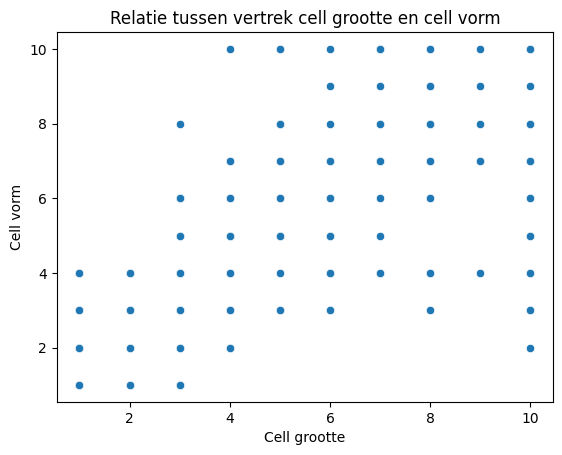

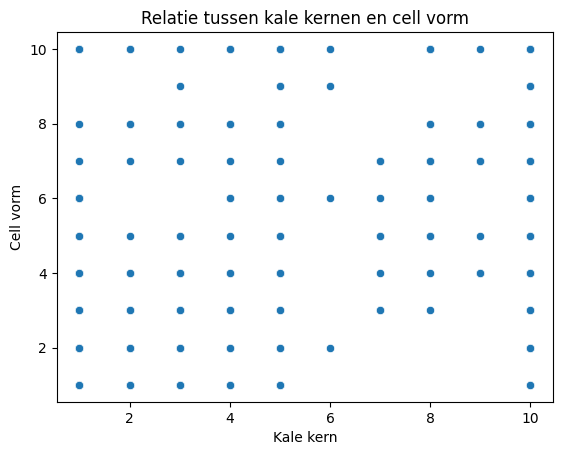

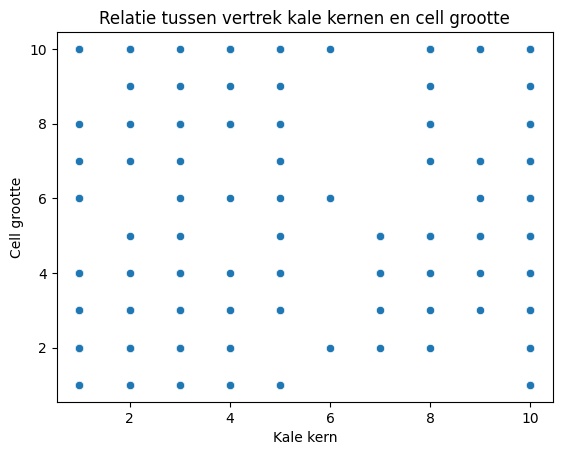

In [3]:
#Scatter plots
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('breastcancer_csv')

df = df.select_dtypes(include=['number'])

#Cell.size en cell.shape
sns.scatterplot(x='Cell.size', y='Cell.shape', data=df)
plt.title('Relatie tussen vertrek cell grootte en cell vorm')
plt.xlabel('Cell grootte')
plt.ylabel('Cell vorm')
plt.show()

#Bare.nuclei en cell.shape
sns.scatterplot(x='Bare.nuclei', y='Cell.shape', data=df)
plt.title('Relatie tussen kale kernen en cell vorm')
plt.xlabel('Kale kern')
plt.ylabel('Cell vorm')
plt.show()

#Cell.size en bare.nuclei
sns.scatterplot(x='Bare.nuclei', y='Cell.size', data=df)
plt.title('Relatie tussen vertrek kale kernen en cell grootte')
plt.xlabel('Kale kern')
plt.ylabel('Cell grootte')
plt.show()


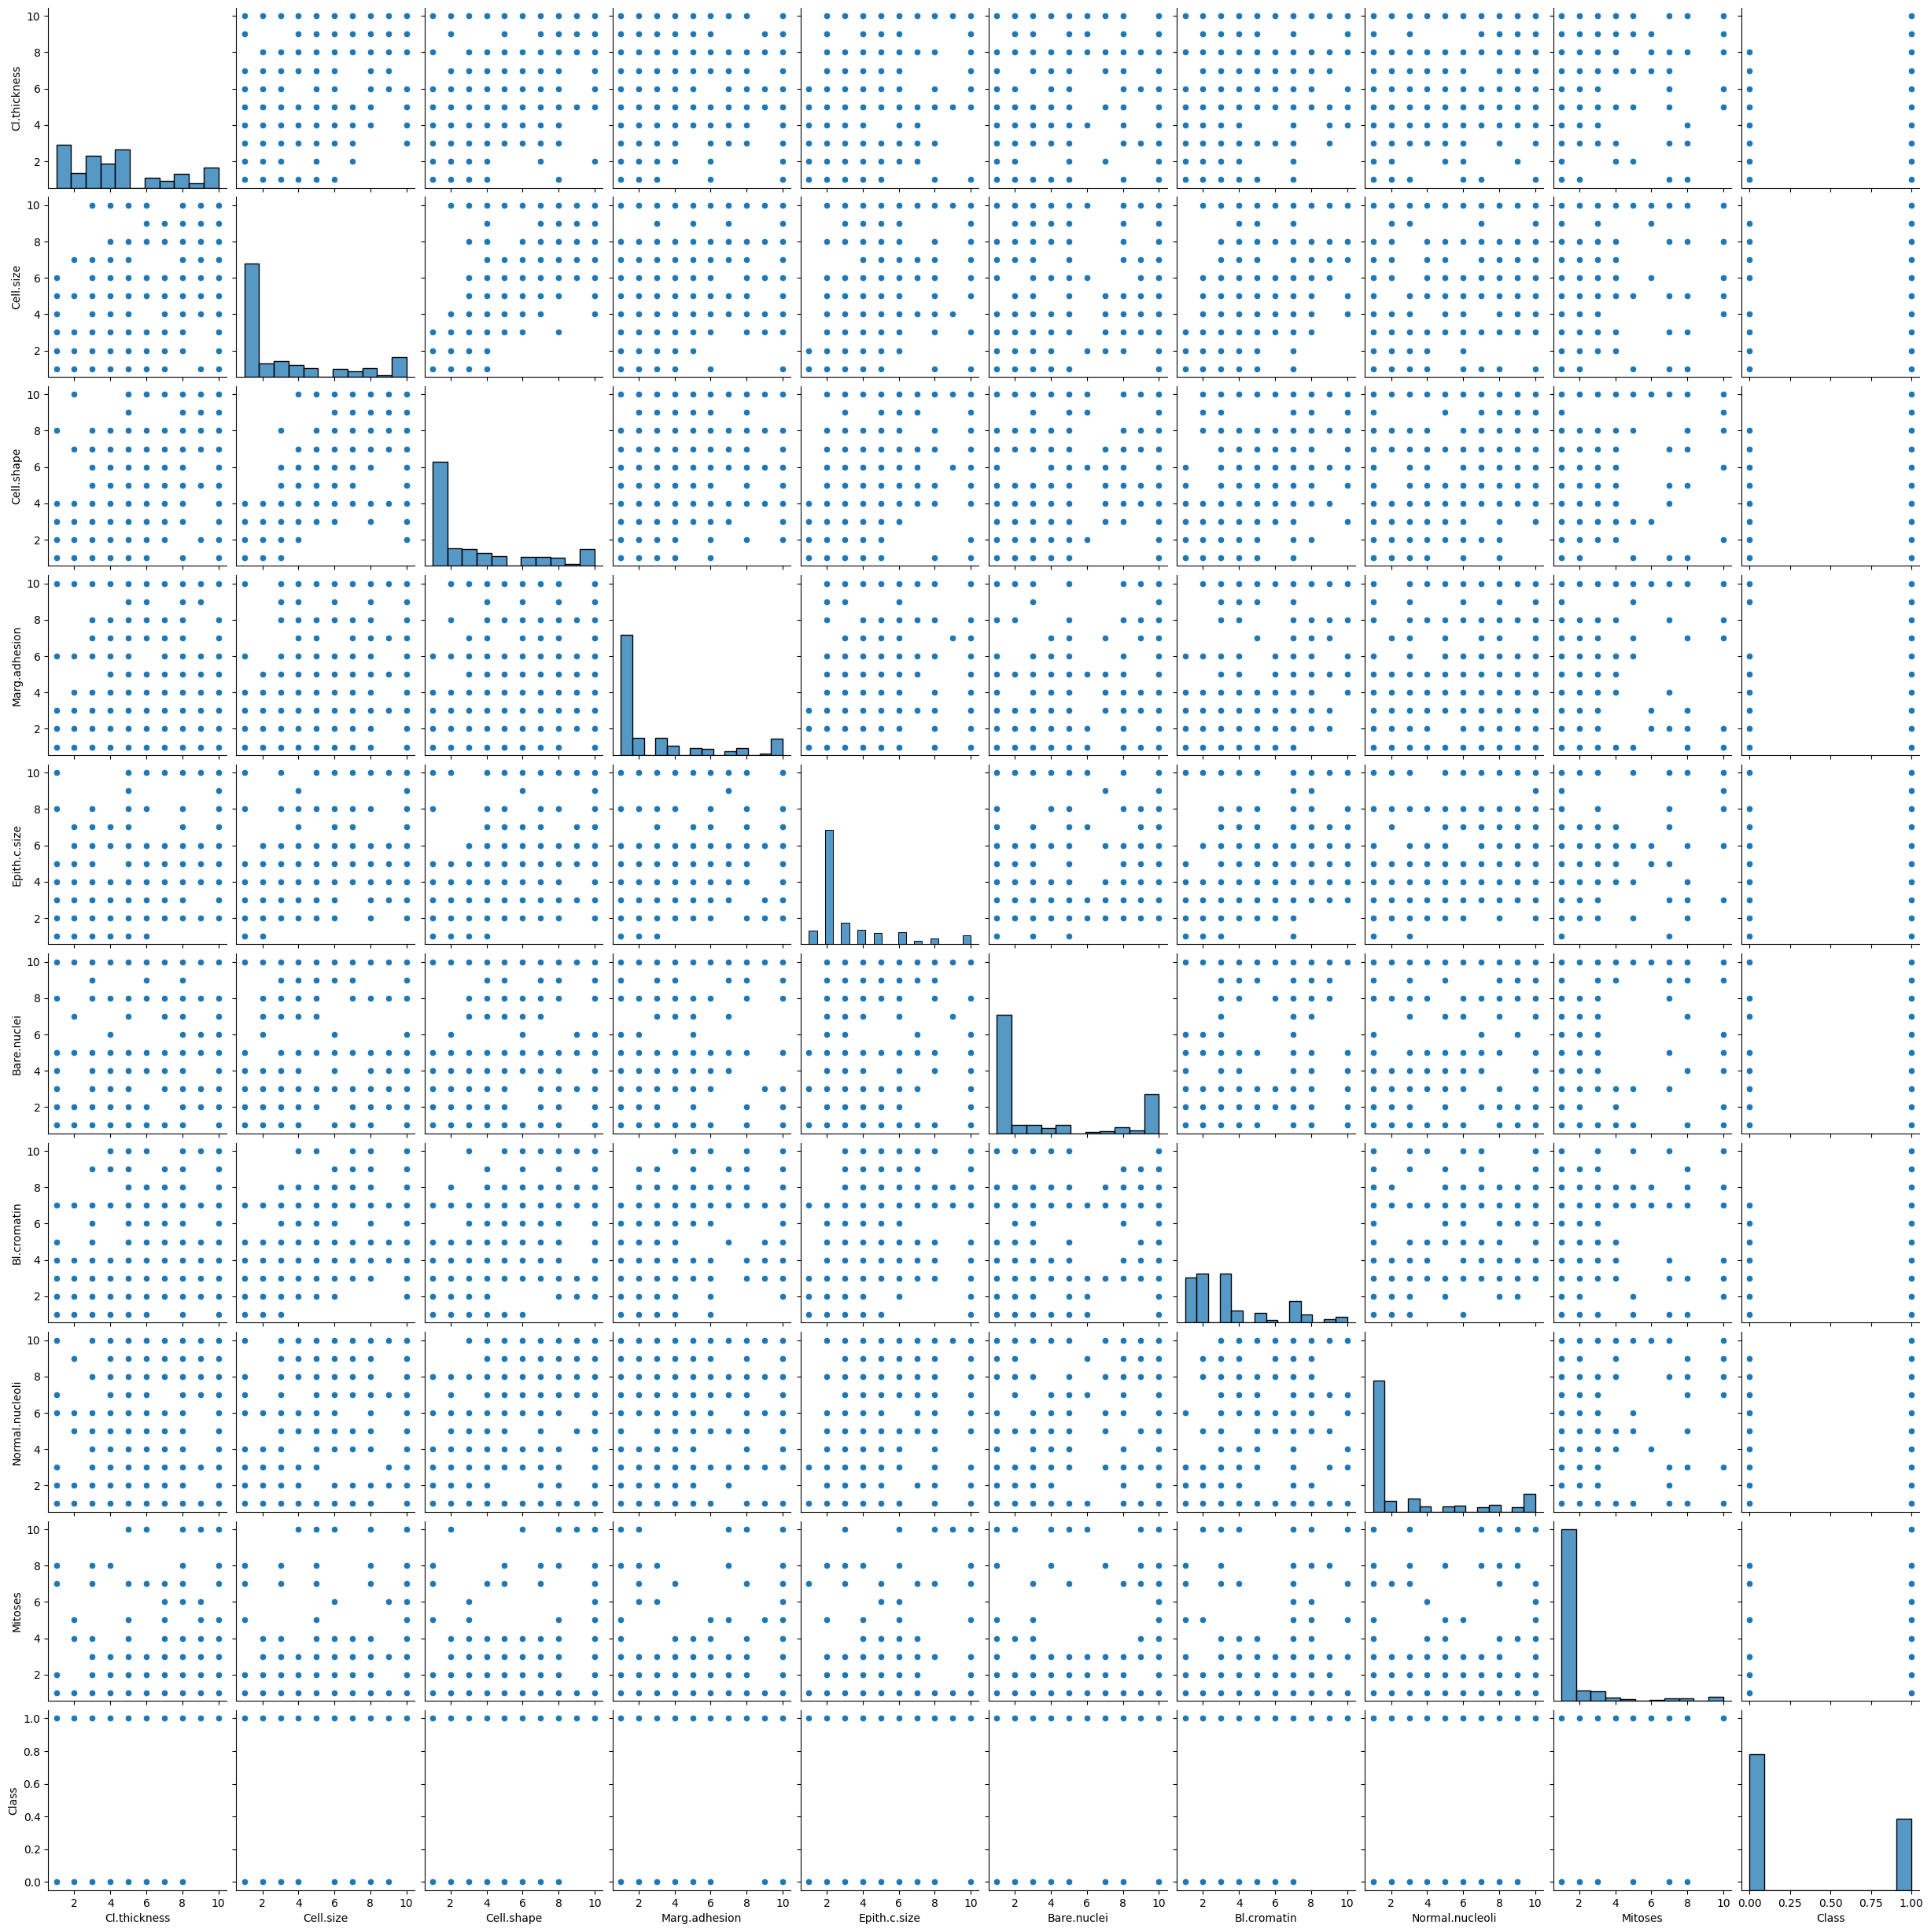

                 Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  \
Cl.thickness         1.000000   0.644913    0.654589       0.486356   
Cell.size            0.644913   1.000000    0.906882       0.705582   
Cell.shape           0.654589   0.906882    1.000000       0.683079   
Marg.adhesion        0.486356   0.705582    0.683079       1.000000   
Epith.c.size         0.521816   0.751799    0.719668       0.599599   
Bare.nuclei          0.593091   0.691709    0.713878       0.670648   
Bl.cromatin          0.558428   0.755721    0.735948       0.666715   
Normal.nucleoli      0.535835   0.722865    0.719446       0.603352   
Mitoses              0.350034   0.458693    0.438911       0.417633   
Class                0.716001   0.817904    0.818934       0.696800   

                 Epith.c.size  Bare.nuclei  Bl.cromatin  Normal.nucleoli  \
Cl.thickness         0.521816     0.593091     0.558428         0.535835   
Cell.size            0.751799     0.691709     0.755721         0.

In [1]:
#Pairplot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('breastcancer_csv')

df = df.drop(columns=['Id'])
df['Class'] = df['Class'].map({'benign': 0, 'malignant': 1})
df = df.select_dtypes(include=['number'])

# Pairplot
sns.pairplot(df)
plt.show()

#Correlation coefficient
correlation_matrix = df.corr()
print(correlation_matrix)

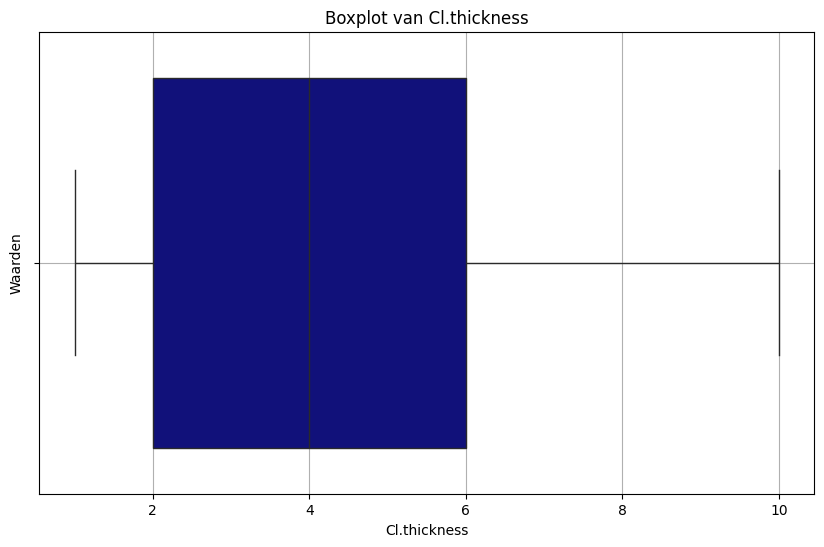

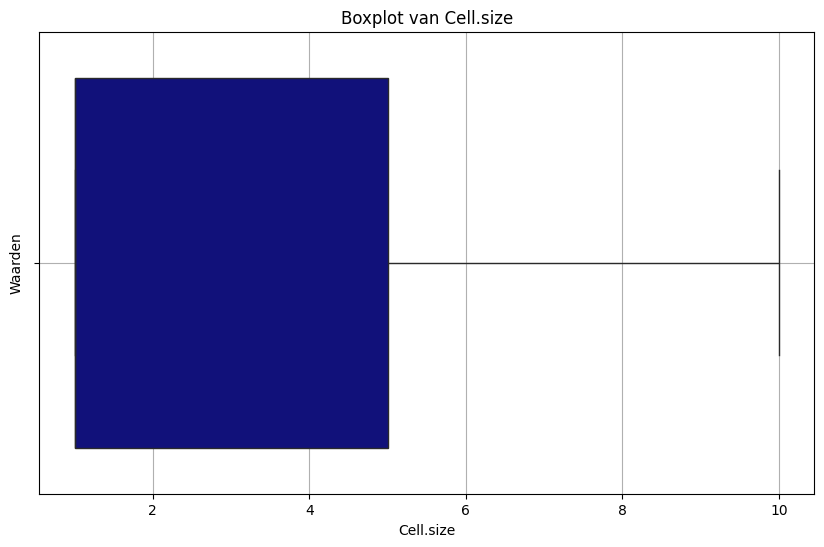

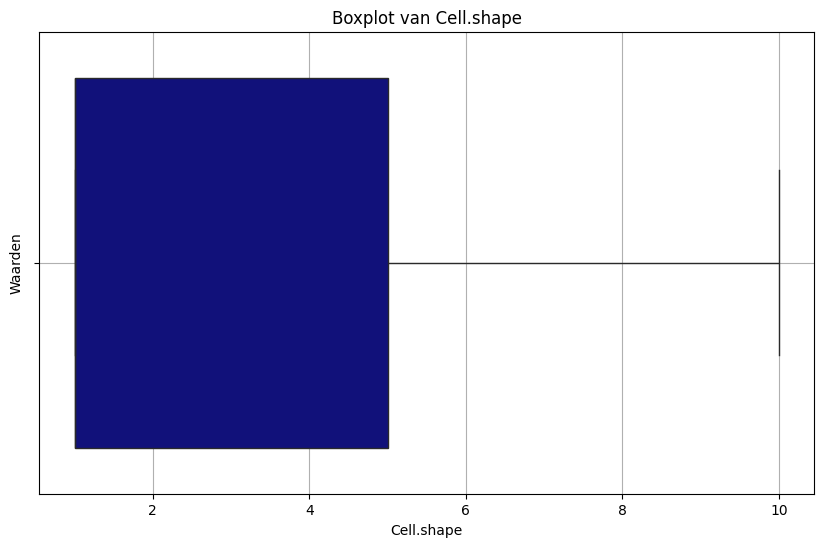

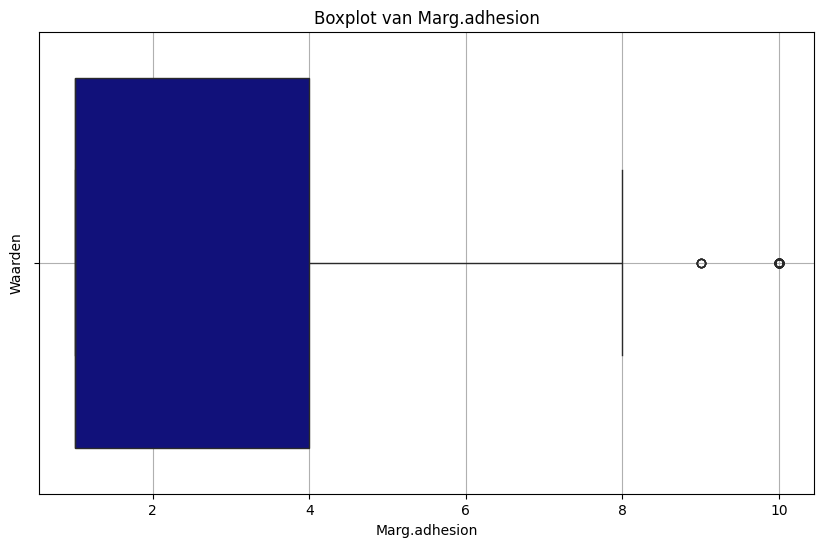

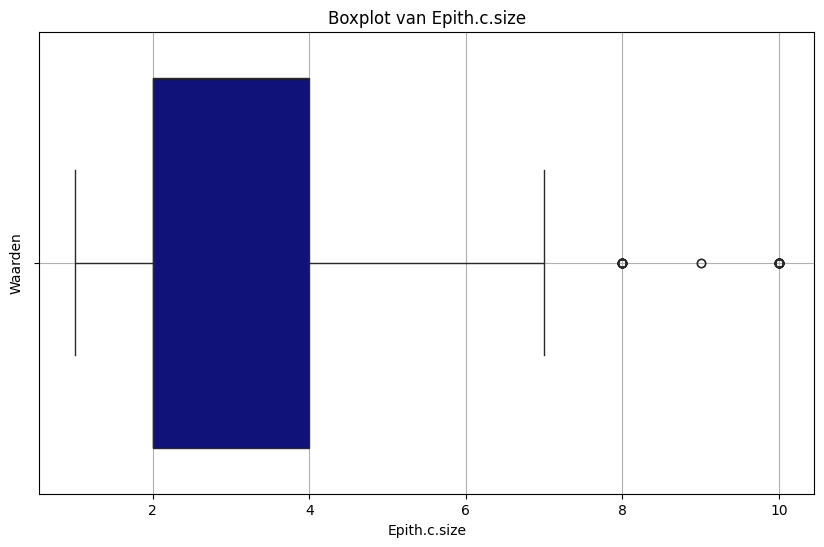

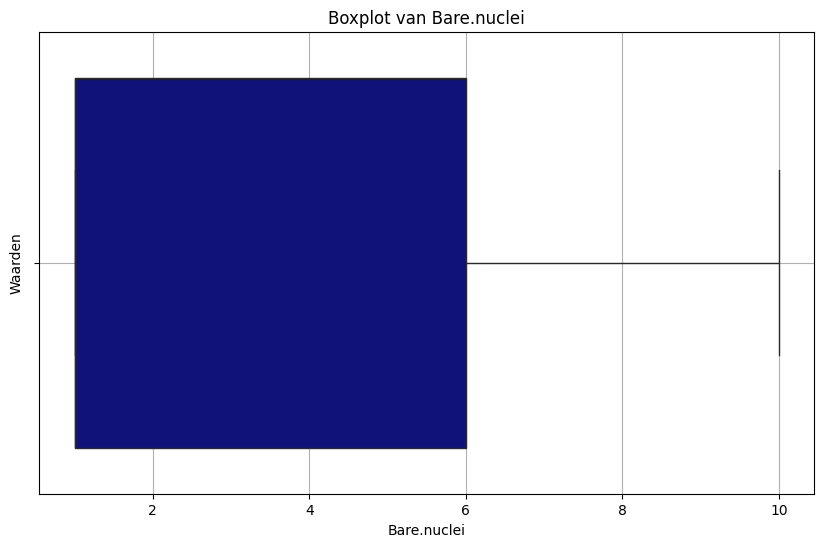

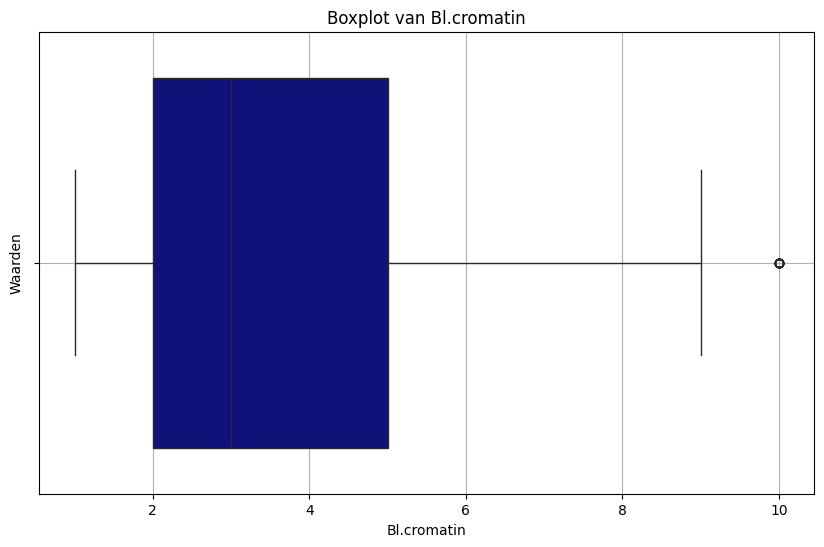

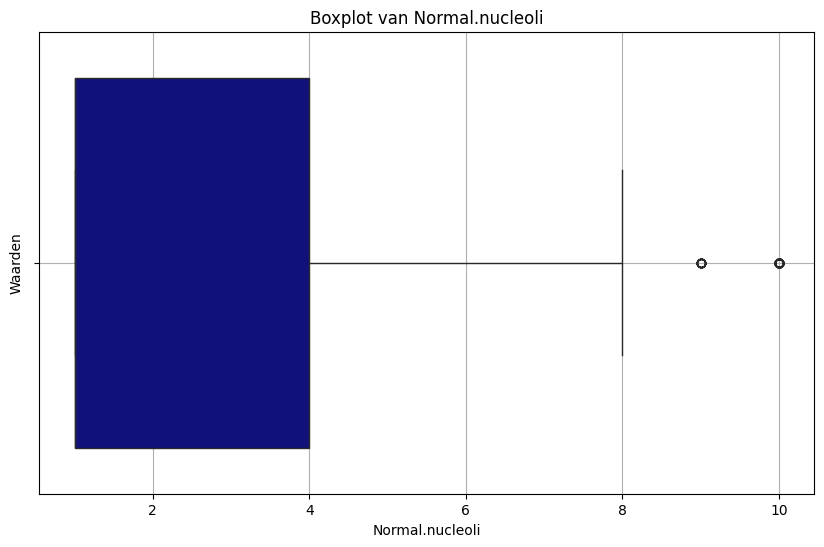

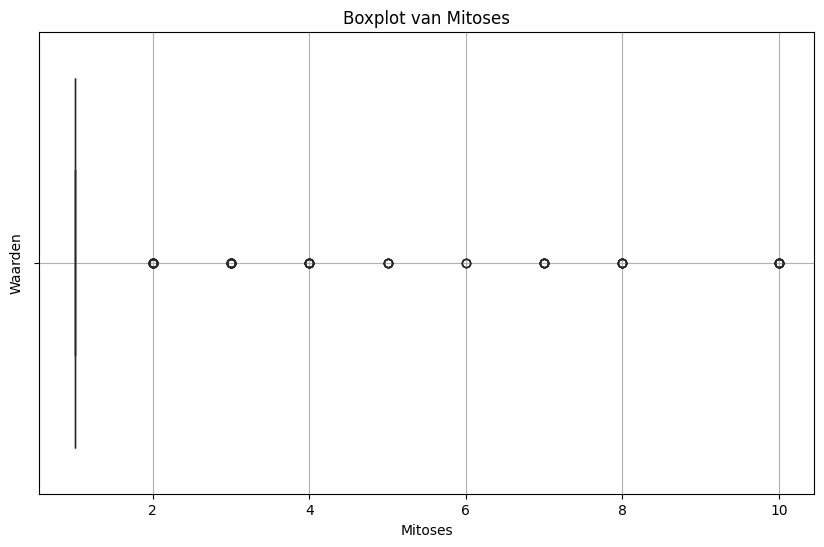

In [10]:
#BOxplots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

abt_df = pd.read_csv('breastcancer_csv')

continuous_features = ['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 'Mitoses']

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=abt_df[feature], orient='h', color='darkblue', showfliers=True)
    plt.title(f'Boxplot van {feature}')
    plt.xlabel(f'{feature}')  # Corrected syntax for concatenating strings
    plt.ylabel('Waarden')
    plt.grid(True)
    plt.show()



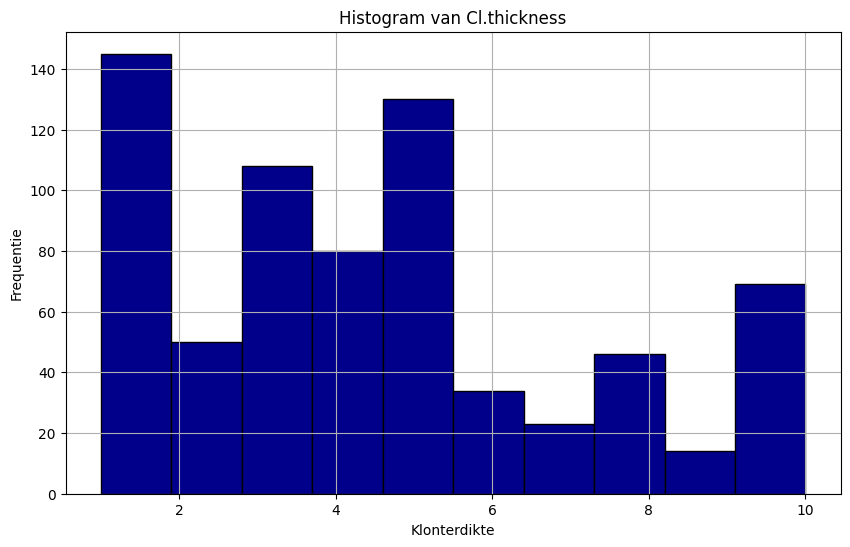

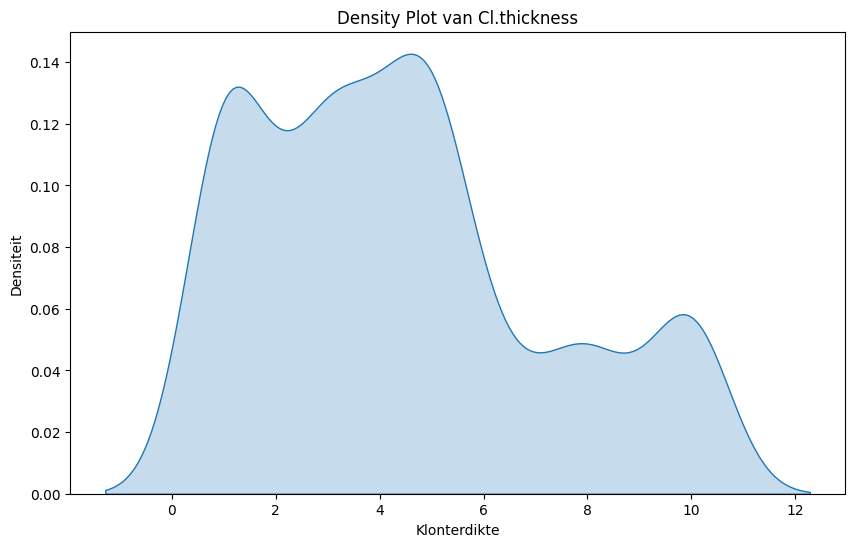

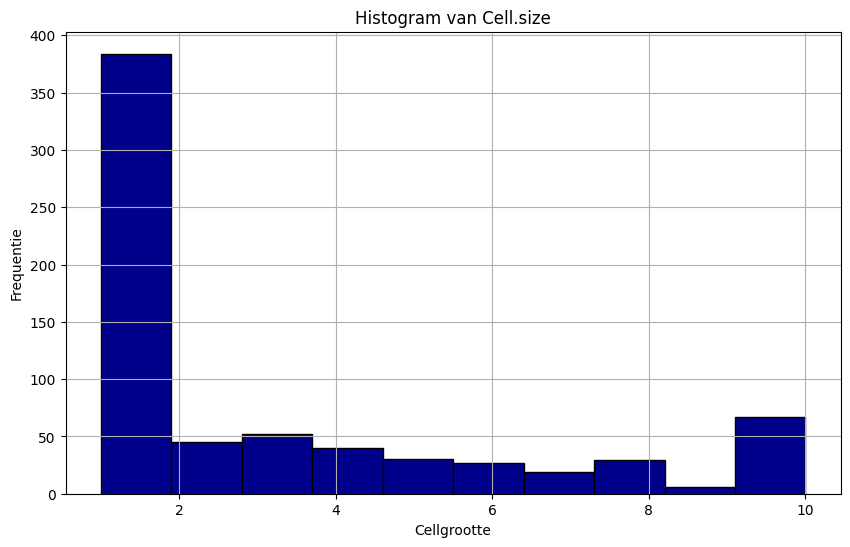

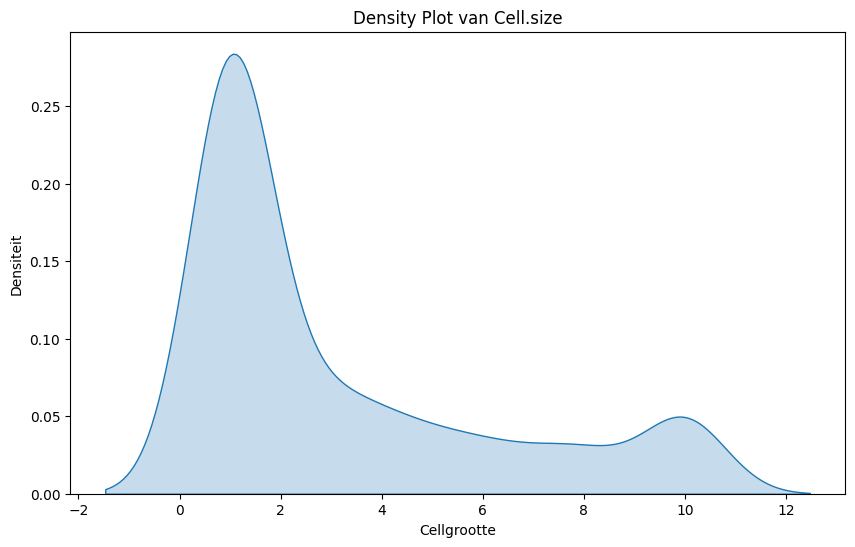

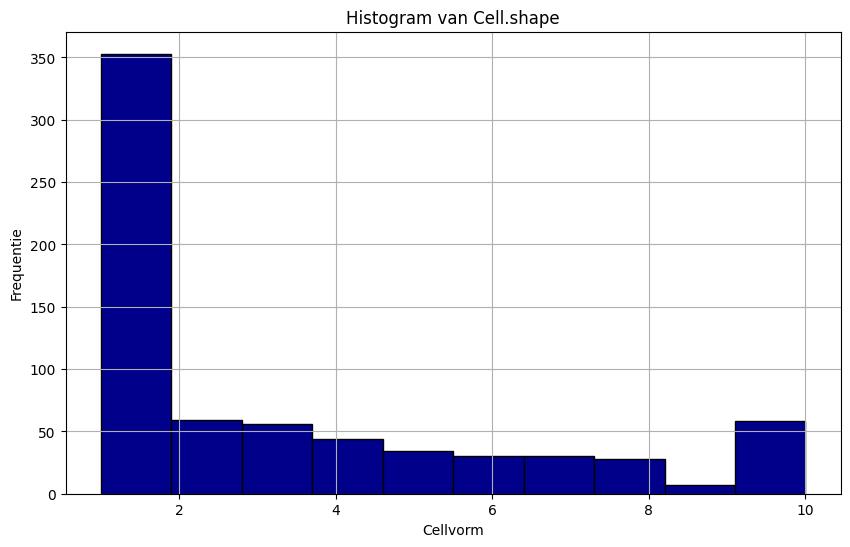

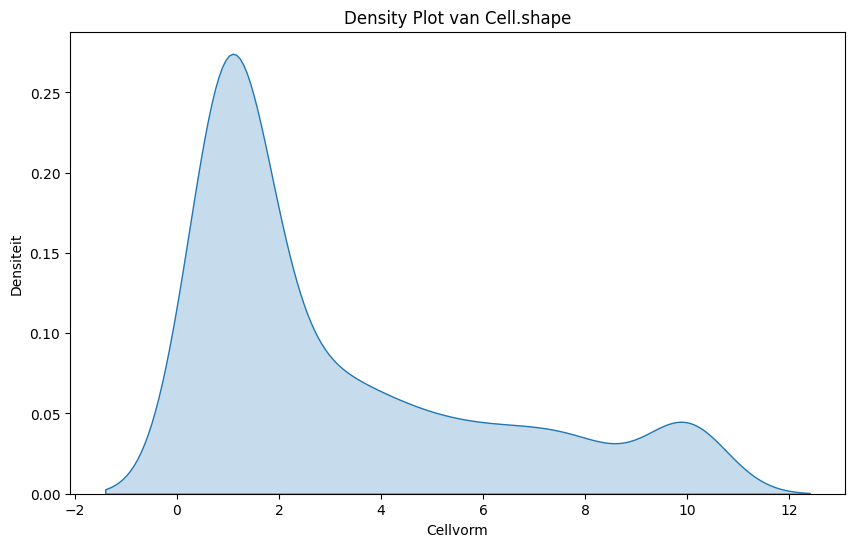

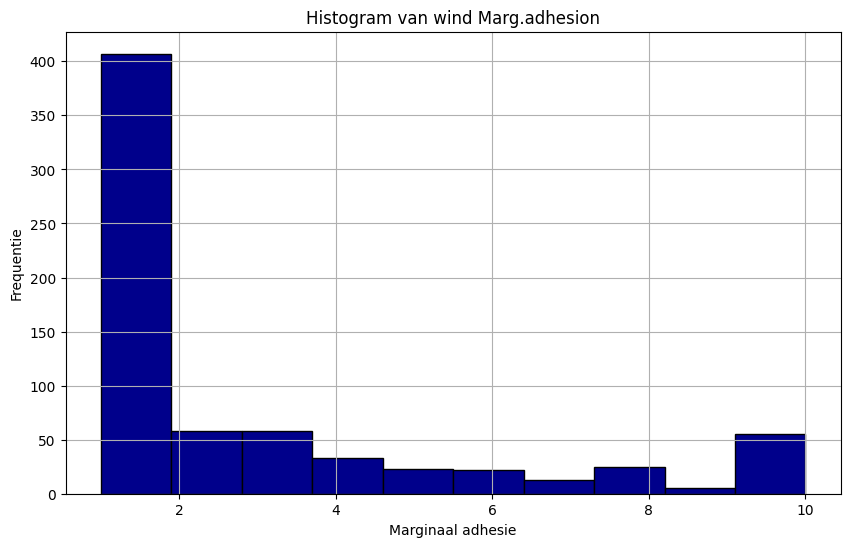

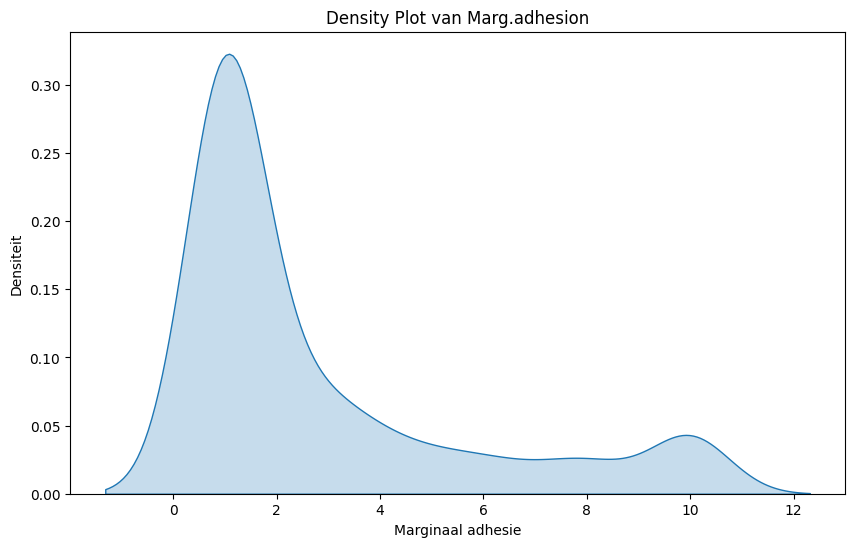

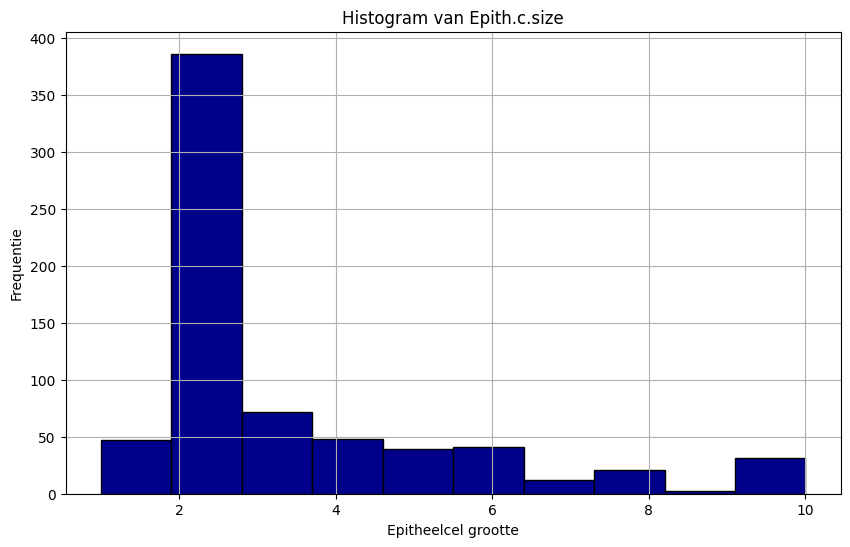

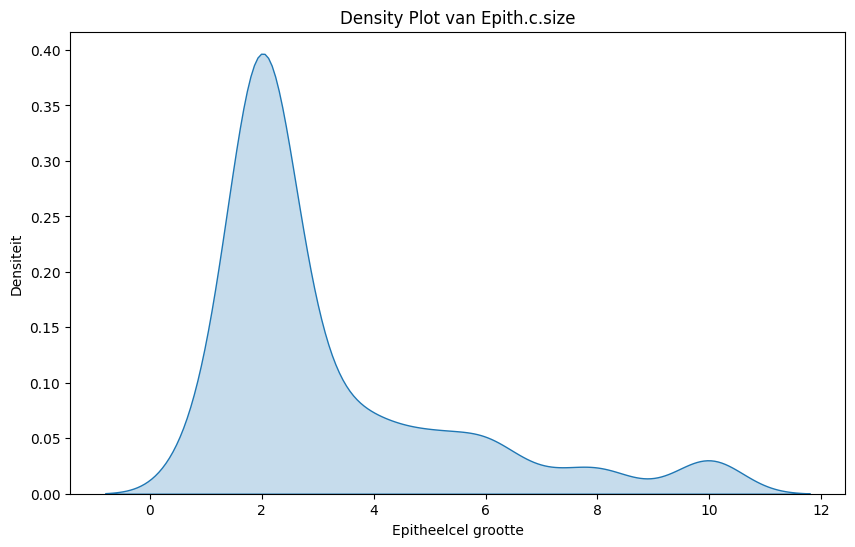

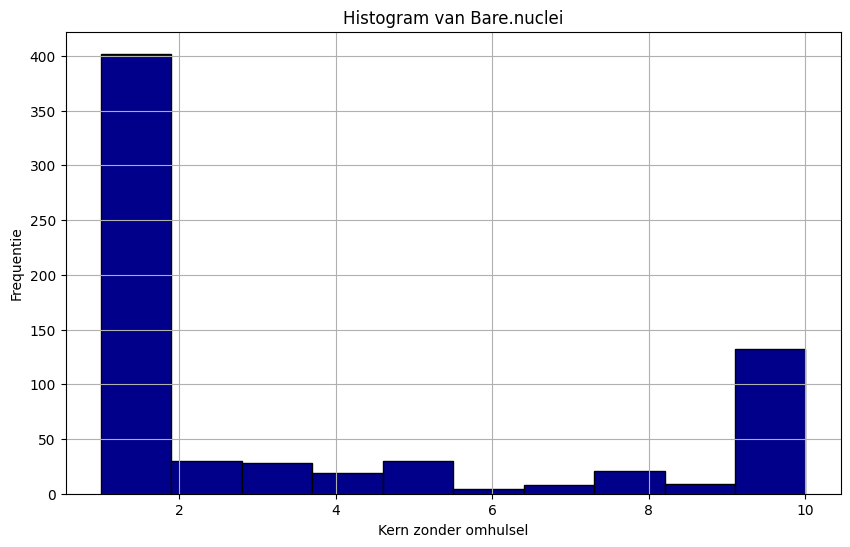

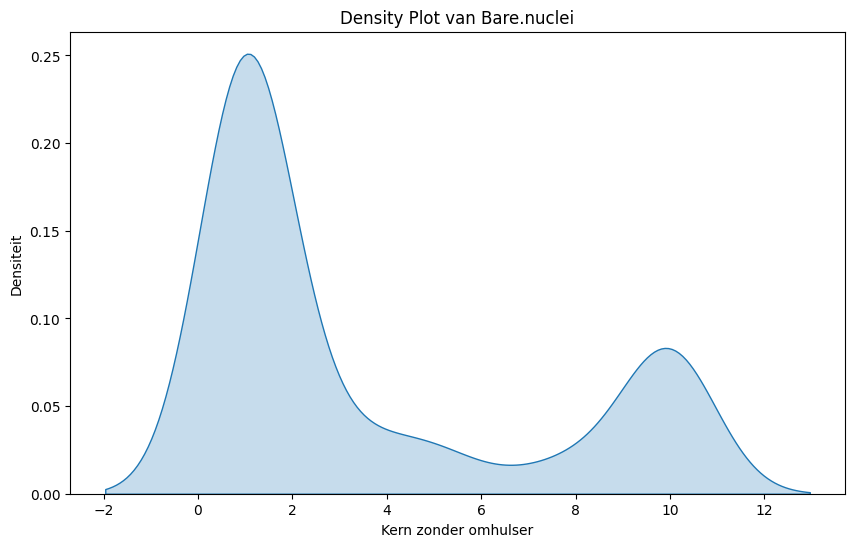

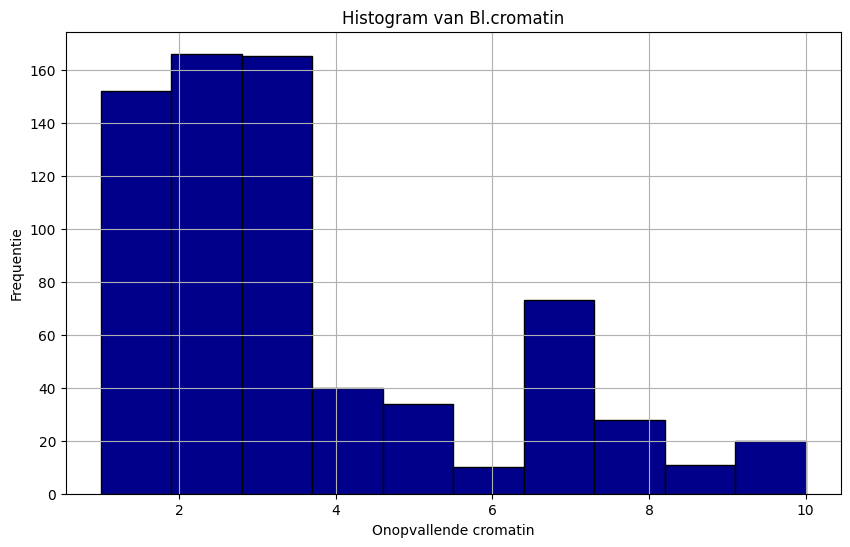

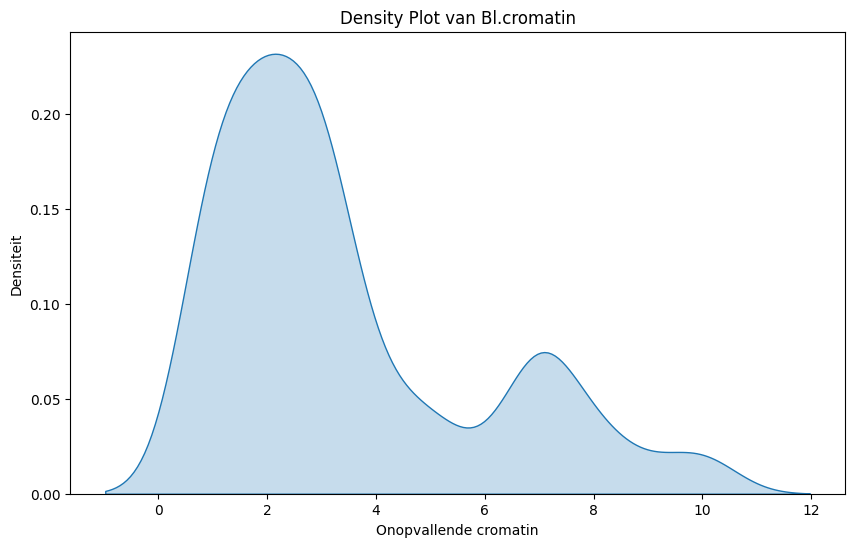

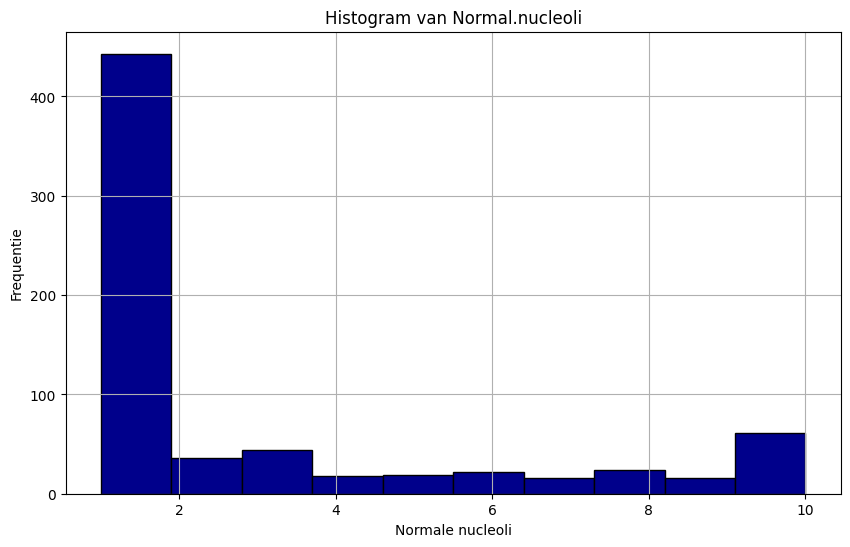

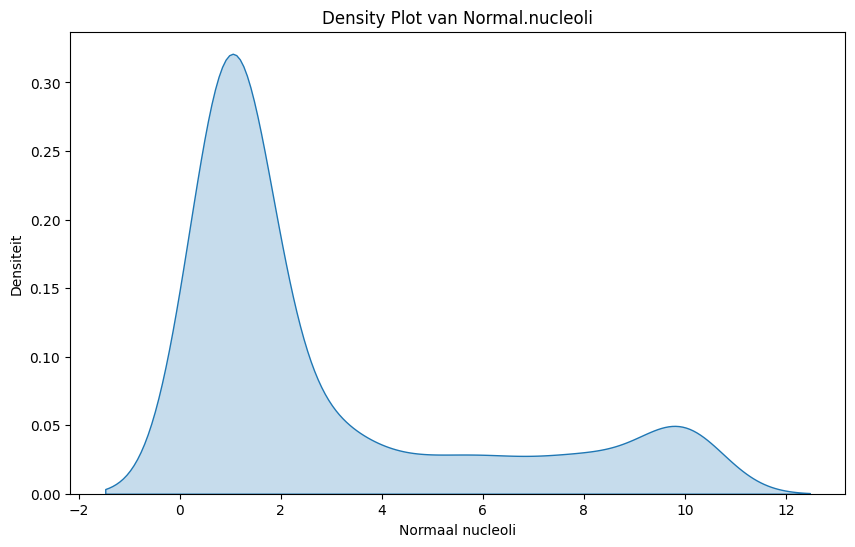

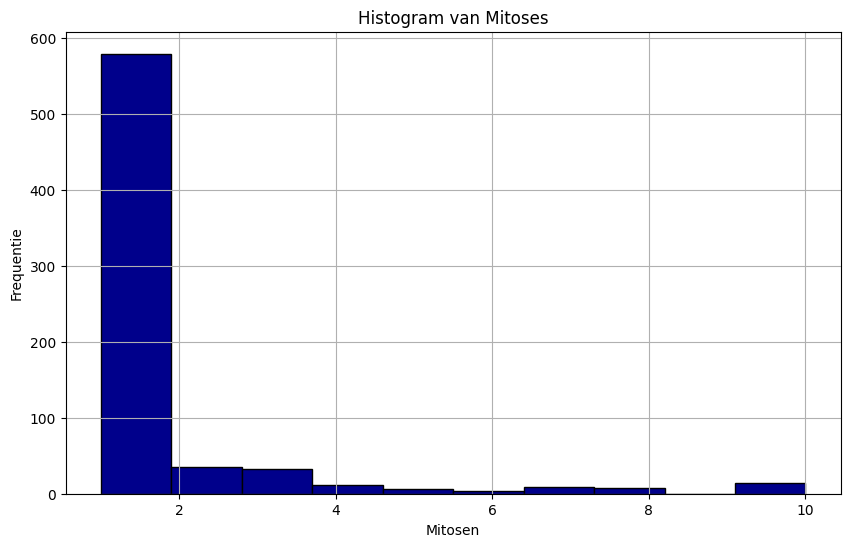

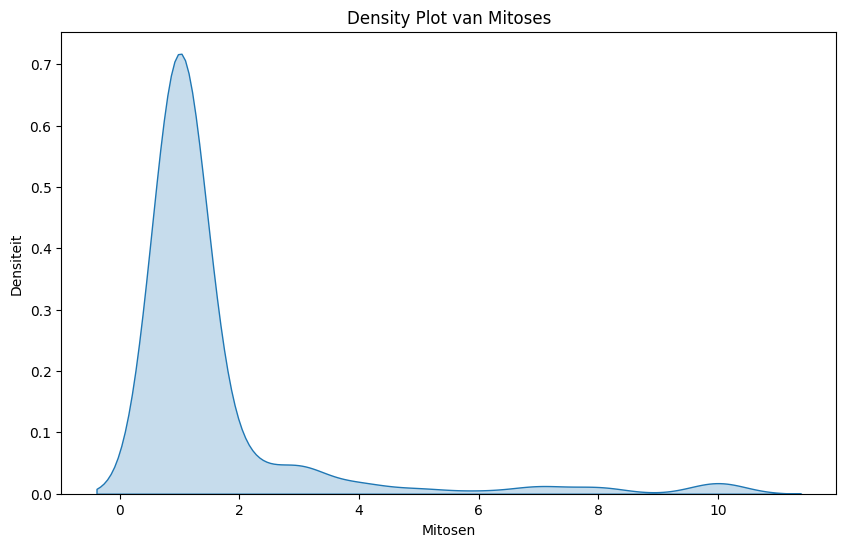

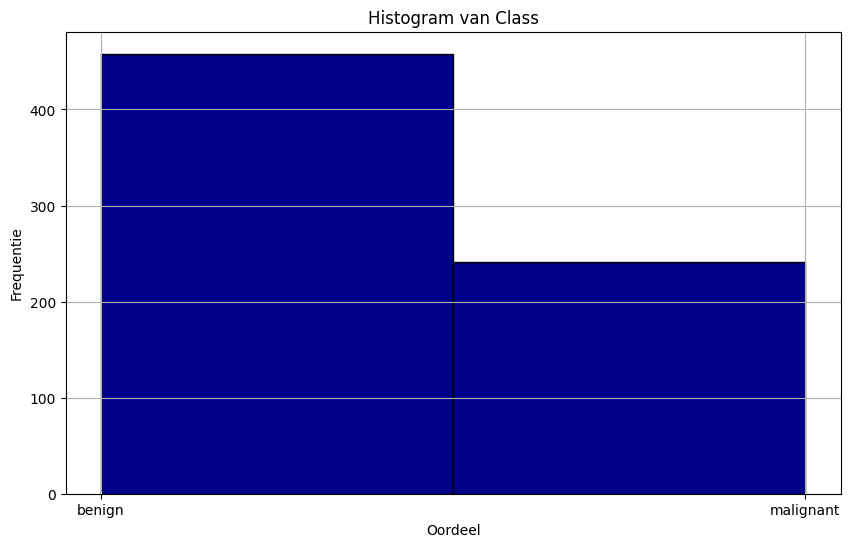

In [7]:
#Histograms and density plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

abt_df = pd.read_csv('breastcancer_csv')

#Cl.thickness
#hist
plt.figure(figsize=(10, 6))
plt.hist(abt_df['Cl.thickness'], bins=10, color='darkblue', edgecolor='black')
plt.title(f'Histogram van Cl.thickness')
plt.xlabel(f'Klonterdikte')
plt.ylabel('Frequentie')
plt.grid(True)
plt.show()
#dens
plt.figure(figsize=(10, 6))
sns.kdeplot(data=abt_df['Cl.thickness'], fill=True)
plt.title(f'Density Plot van Cl.thickness')
plt.xlabel(f'Klonterdikte')
plt.ylabel('Densiteit')
plt.show()

#Cell.size
#hist
plt.figure(figsize=(10, 6))
plt.hist(abt_df['Cell.size'], bins=10, color='darkblue', edgecolor='black')
plt.title(f'Histogram van Cell.size')
plt.xlabel(f'Cellgrootte')
plt.ylabel('Frequentie')
plt.grid(True)
plt.show()
#dens
plt.figure(figsize=(10, 6))
sns.kdeplot(data=abt_df['Cell.size'], fill=True)
plt.title(f'Density Plot van Cell.size')
plt.xlabel(f'Cellgrootte')
plt.ylabel('Densiteit')
plt.show()

#Cell.shape
#hist
plt.figure(figsize=(10, 6))
plt.hist(abt_df['Cell.shape'], bins=10, color='darkblue', edgecolor='black')
plt.title(f'Histogram van Cell.shape')
plt.xlabel(f'Cellvorm')
plt.ylabel('Frequentie')
plt.grid(True)
plt.show()
#dens
plt.figure(figsize=(10, 6))
sns.kdeplot(data=abt_df['Cell.shape'], fill=True)
plt.title(f'Density Plot van Cell.shape')
plt.xlabel(f'Cellvorm')
plt.ylabel('Densiteit')
plt.show()

#Marg.adhesion
#hist
plt.figure(figsize=(10, 6))
plt.hist(abt_df['Marg.adhesion'], bins=10, color='darkblue', edgecolor='black')
plt.title(f'Histogram van wind Marg.adhesion')
plt.xlabel(f'Marginaal adhesie')
plt.ylabel('Frequentie')
plt.grid(True)
plt.show()
#dens
plt.figure(figsize=(10, 6))
sns.kdeplot(data=abt_df['Marg.adhesion'], fill=True)
plt.title(f'Density Plot van Marg.adhesion')
plt.xlabel(f'Marginaal adhesie')
plt.ylabel('Densiteit')
plt.show()

#Epith.c.size
#hist
plt.figure(figsize=(10, 6))
plt.hist(abt_df['Epith.c.size'], bins=10, color='darkblue', edgecolor='black')
plt.title(f'Histogram van Epith.c.size')
plt.xlabel(f'Epitheelcel grootte')
plt.ylabel('Frequentie')
plt.grid(True)
plt.show()
#dens
plt.figure(figsize=(10, 6))
sns.kdeplot(data=abt_df['Epith.c.size'], fill=True)
plt.title(f'Density Plot van Epith.c.size')
plt.xlabel(f'Epitheelcel grootte')
plt.ylabel('Densiteit')
plt.show()

#BAre.nuclei
#hist
plt.figure(figsize=(10, 6))
plt.hist(abt_df['Bare.nuclei'], bins=10, color='darkblue', edgecolor='black')
plt.title(f'Histogram van Bare.nuclei')
plt.xlabel(f'Kern zonder omhulsel')
plt.ylabel('Frequentie')
plt.grid(True)
plt.show()
#dens
plt.figure(figsize=(10, 6))
sns.kdeplot(data=abt_df['Bare.nuclei'], fill=True)
plt.title(f'Density Plot van Bare.nuclei')
plt.xlabel(f'Kern zonder omhulser')
plt.ylabel('Densiteit')
plt.show()

#Bl.cromatin
#hist
plt.figure(figsize=(10, 6))
plt.hist(abt_df['Bl.cromatin'], bins=10, color='darkblue', edgecolor='black')
plt.title(f'Histogram van Bl.cromatin')
plt.xlabel(f'Onopvallende cromatin')
plt.ylabel('Frequentie')
plt.grid(True)
plt.show()
#dens
plt.figure(figsize=(10, 6))
sns.kdeplot(data=abt_df['Bl.cromatin'], fill=True)
plt.title(f'Density Plot van Bl.cromatin')
plt.xlabel(f'Onopvallende cromatin')
plt.ylabel('Densiteit')
plt.show()

#Normal.nucleoli
#hist
plt.figure(figsize=(10, 6))
plt.hist(abt_df['Normal.nucleoli'], bins=10, color='darkblue', edgecolor='black')
plt.title(f'Histogram van Normal.nucleoli')
plt.xlabel(f'Normale nucleoli')
plt.ylabel('Frequentie')
plt.grid(True)
plt.show()
#dens
plt.figure(figsize=(10, 6))
sns.kdeplot(data=abt_df['Normal.nucleoli'], fill=True)
plt.title(f'Density Plot van Normal.nucleoli')
plt.xlabel(f'Normaal nucleoli')
plt.ylabel('Densiteit')
plt.show()

#Mitoses
#hist
plt.figure(figsize=(10, 6))
plt.hist(abt_df['Mitoses'], bins=10, color='darkblue', edgecolor='black')
plt.title(f'Histogram van Mitoses')
plt.xlabel(f'Mitosen')
plt.ylabel('Frequentie')
plt.grid(True)
plt.show()
#dens
plt.figure(figsize=(10, 6))
sns.kdeplot(data=abt_df['Mitoses'], fill=True)
plt.title(f'Density Plot van Mitoses')
plt.xlabel(f'Mitosen')
plt.ylabel('Densiteit')
plt.show()

#Class
#hist
plt.figure(figsize=(10, 6))
plt.hist(abt_df['Class'], bins=2, color='darkblue', edgecolor='black')
plt.title(f'Histogram van Class')
plt.xlabel(f'Oordeel')
plt.ylabel('Frequentie')
plt.grid(True)
plt.show()


In [3]:
#Table data categorical features
import pandas as pd
import matplotlib.pyplot as plt

abt_df = pd.read_csv('breastcancer_csv')

categorical_features = ['Class']

for feature in categorical_features:
    mode_value = abt_df[feature].mode()[0]
    
    mode_frequency = abt_df[feature].value_counts().max()
    
    mode_percentage = (mode_frequency / len(abt_df)) * 100
    
    second_mode_value = abt_df[feature].value_counts().index[1] if len(abt_df[feature].value_counts()) > 1 else None
    second_mode_frequency = abt_df[feature].value_counts().iloc[1] if len(abt_df[feature].value_counts()) > 1 else None
    
    second_mode_percentage = (second_mode_frequency / len(abt_df)) * 100 if second_mode_frequency else None
    
    missing_values_percentage = (abt_df[feature].isnull().sum() / len(abt_df)) * 100
    
    cardinality = abt_df[feature].nunique()
    
    total_count = len(abt_df)
    
    print(f"\nCategorical Data Quality Report for {feature}:")
    print(f"Mode: {mode_value}")
    print(f"Mode Frequency: {mode_frequency}")
    print(f"Mode Percentage: {mode_percentage}%")
    print(f"Second Mode: {second_mode_value}")
    print(f"Second Mode Frequency: {second_mode_frequency}")
    print(f"Second Mode Percentage: {second_mode_percentage}%")
    print(f"Missing Values Percentage: {missing_values_percentage}%")
    print(f"Cardinality: {cardinality}")
    print(f"Total Count: {total_count}")



Categorical Data Quality Report for Class:
Mode: benign
Mode Frequency: 458
Mode Percentage: 65.52217453505007%
Second Mode: malignant
Second Mode Frequency: 241
Second Mode Percentage: 34.47782546494993%
Missing Values Percentage: 0.0%
Cardinality: 2
Total Count: 699


In [2]:
#Table data
import pandas as pd
import matplotlib.pyplot as plt

abt_df = pd.read_csv('breastcancer_csv')

continuous_features = ['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 'Mitoses']

continuous_stats = abt_df[continuous_features].describe().transpose()

missing_values_count = abt_df[continuous_features].isnull().sum()

missing_values_percentage = (missing_values_count / len(abt_df)) * 100

cardinality = abt_df[continuous_features].nunique()

continuous_data_quality_report = pd.DataFrame({
    'Feature': continuous_stats.index,
    'Minimum': continuous_stats['min'],
    '1st Quartile': continuous_stats['25%'],
    'Mean': continuous_stats['mean'],
    'Median': continuous_stats['50%'],
    '3rd Quartile': continuous_stats['75%'],
    'Maximum': continuous_stats['max'],
    'Standard Deviation': continuous_stats['std'],
    'Total Instances': len(abt_df),
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Cardinality': cardinality
})

print("Continuous Data Quality Report:")
print(continuous_data_quality_report)

Continuous Data Quality Report:
                         Feature  Minimum  1st Quartile      Mean  Median  \
Cl.thickness        Cl.thickness      1.0           2.0  4.417740     4.0   
Cell.size              Cell.size      1.0           1.0  3.134478     1.0   
Cell.shape            Cell.shape      1.0           1.0  3.207439     1.0   
Marg.adhesion      Marg.adhesion      1.0           1.0  2.806867     1.0   
Epith.c.size        Epith.c.size      1.0           2.0  3.216023     2.0   
Bare.nuclei          Bare.nuclei      1.0           1.0  3.544656     1.0   
Bl.cromatin          Bl.cromatin      1.0           2.0  3.437768     3.0   
Normal.nucleoli  Normal.nucleoli      1.0           1.0  2.866953     1.0   
Mitoses                  Mitoses      1.0           1.0  1.589413     1.0   

                 3rd Quartile  Maximum  Standard Deviation  Total Instances  \
Cl.thickness              6.0     10.0            2.815741              699   
Cell.size                 5.0     10.0 

In [1]:
import pandas as pd

df = pd.read_csv('breastcancer_csv')

print(df)

          Id  Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  \
0    1000025             5          1           1              1   
1    1002945             5          4           4              5   
2    1015425             3          1           1              1   
3    1016277             6          8           8              1   
4    1017023             4          1           1              3   
..       ...           ...        ...         ...            ...   
694   776715             3          1           1              1   
695   841769             2          1           1              1   
696   888820             5         10          10              3   
697   897471             4          8           6              4   
698   897471             4          8           8              5   

     Epith.c.size  Bare.nuclei  Bl.cromatin  Normal.nucleoli  Mitoses  \
0               2          1.0            3                1        1   
1               7         10.0       